### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re

### read the scraped data using pandas

In [2]:
raw_data = pd.read_csv("raw_data.csv")

In [3]:
raw_data.head(2)

,Title,Company,Location,JD,URL
0,AR/VR Business Analyst,Tailored Management,"Menlo Park, CA",skills: Consolidate third-party retailer sale...,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...
1,"Producer, Augmented Reality (Menlo Park)",The Mom Project,"Menlo Park, CA",skills: Work closely with creative leads to s...,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...


### perform basic cleaning on JD

In [4]:
# remove any special characters and remove new line \n
raw_data['JD'] = raw_data["JD"].map(lambda x: re.sub('[,\.!?]', '', x))
raw_data['JD'] = raw_data['JD'].map(lambda x: x.replace("\n",""))

In [5]:
# generate new feature by converting the cleaned data into lower case
raw_data['JD_processed'] = raw_data['JD'].map(lambda x: x.lower())

In [6]:
raw_data.head(2)

,Title,Company,Location,JD,URL,JD_processed
0,AR/VR Business Analyst,Tailored Management,"Menlo Park, CA",skills: Consolidate third-party retailer sale...,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...,skills: consolidate third-party retailer sale...
1,"Producer, Augmented Reality (Menlo Park)",The Mom Project,"Menlo Park, CA",skills: Work closely with creative leads to s...,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...,skills: work closely with creative leads to s...


### A function to assign Job roles based on the job title

In [7]:
def assign_roles(row):
    row = row.lower()
    if 'accountant' in row:
        return 'accountant'
    elif 'marketing' in row:
        return 'marketing'
    elif 'security' in row and 'manager' in row:
        return 'security'
    elif 'manager' in row and 'engineer' in row:
        return 'Engineering manager'
    elif 'manager' in row:
        return 'manager'
    elif 'director' in row:
        return 'director'
    elif 'software' in row or 'engineer' in row:
        return 'engineer'
    elif 'finance' in row:
        return 'financial analyst'
    elif 'analyst' in row:
        return 'analyst'
    else:
        return 'other'

In [8]:
# add job role feature to the dataset 
# categorize job listing
raw_data['Role'] = raw_data['Title'].apply(lambda row: assign_roles(row))
raw_data.head()

,Title,Company,Location,JD,URL,JD_processed,Role
0,AR/VR Business Analyst,Tailored Management,"Menlo Park, CA",skills: Consolidate third-party retailer sale...,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...,skills: consolidate third-party retailer sale...,analyst
1,"Producer, Augmented Reality (Menlo Park)",The Mom Project,"Menlo Park, CA",skills: Work closely with creative leads to s...,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...,skills: work closely with creative leads to s...,other
2,"Content Manager, AR/VR (Japanese Market)",An Innovative VR Company,"Menlo Park, CA",skills: Curate and manage the App Store and a...,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...,skills: curate and manage the app store and a...,manager
3,AR/VR Apps Review Specialist,Facebook,"Menlo Park, CA",skills: Execute testing process for third par...,https://www.indeed.com//rc/clk?jk=11bf7d641f87...,skills: execute testing process for third par...,other
4,Strategic Planning & Operations Lead for Faceb...,Facebook,"Menlo Park, CA",skills: Strategic Planning: Collaborate with ...,https://www.indeed.com//rc/clk?jk=4edd3fa153d3...,skills: strategic planning: collaborate with ...,other


In [9]:
# check how many job rols in each category we have
raw_data.Role.value_counts()

manager                17
other                  17
engineer               15
marketing              11
analyst                 9
director                7
Engineering manager     2
accountant              1
financial analyst       1
Name: Role, dtype: int64

### Job Description Column cleaning

In [10]:
# stop words to remove from the JD that doen't add any meaning to the JD Skills
from stop_words import get_stop_words
en_stop = get_stop_words('en')
en_stop.extend(['work','monday','friday','day','shift','hour','authorization''globally', 'approvals', 'keep', 'revision', 'months',
       'roadblocks', 'child', 'expression', 'facilitates', 'birth','spec', 'spouse', 'stakeholder','desired', 'advising', 'proposed', 'align', 'alike', 'daily',
       'medical', 'meets', 'days', 'effects', 'mr', 'anchor', 'predict','benefit', 'implemented', 'benefits', 'delivered','years','experience',
       'ltd', 'deployment', 'assignment', 'unlock','401k', '4000','articulating', 'pto', 'schedules', 'conditions', 'life',
       'agencies', 'std','united','states'])


### NLP Using RAKE
***
RAKE short for Rapid Automatic Keyword Extraction algorithm, is a domain independent keyword extraction algorithm which tries to <br> determine key phrases in a body of text by analyzing the frequency of word appearance and its co-occurance with other words in the text.



In [11]:
# a function to convert the list of words into a string for 
# drawing a word cloud later for different job roles
def get_words_as_string(words):
    text = ""
    for item in words:
        #print(item[1])
        text +=" " + item[1]
    return text

In [12]:
# a function to draw word cloud for different types of jobs
# save the output to local file system
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_word_cloud(text,fname,st_wrds):
    fname="images/"+fname+".png"
    wordcloud = WordCloud(stopwords=st_wrds,max_font_size=60).generate(text)
    wordcloud.to_file(filename=fname)
    plt.figure(figsize=(16,12))

    # plot wordcloud in matplotlib
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

### AR/VR Analyst Job posting

In [13]:
# import rake library
from rake_nltk import Rake
# Uses stopwords for english from NLTK, and all puntuation characters.
r = Rake(
    stopwords=en_stop,
    max_length=3,
    min_length=1,) 

In [14]:
# extract the keywords (skill sets) from the JD of the job posts 
# for the position of AR/VR analyst in Menlo Park, CA.
r.extract_keywords_from_text(''.join(raw_data[raw_data["Role"]=="analyst"].JD_processed.values))
skills = r.get_ranked_phrases_with_scores()

In [16]:
df_analyst = pd.DataFrame(skills, columns=['score', 'keywords'])

In [17]:
df_analyst.head()

,score,keywords
0,9.0,similar scripting language
1,9.0,retail industry preferred
2,9.0,presto spark hive
3,9.0,nps csat etc
4,9.0,manipulating raw datasets


In [18]:
df_analyst.tail()

,score,keywords
98,1.0,internal
99,1.0,customers
100,1.0,collaborate
101,1.0,area
102,1.0,8


In [19]:
# filter out the less important words from the result
# based on the scores of each words assigned by RAKE NLTK Library
skills_analyst = list(filter(lambda x: float(x[0]) >= 4.5 , skills))

In [20]:
# create string from the list of tuples for drawing wordcloud
text = get_words_as_string(skills_analyst)

## EDA
***
Let's draw a wordcloud using the extracted keywords from the JD for an Analyst role

In [21]:
# remove some noises from the output
st_wrds = ['using','similar','feedback','reports','preferred','consumer','customer','etc','audiences']

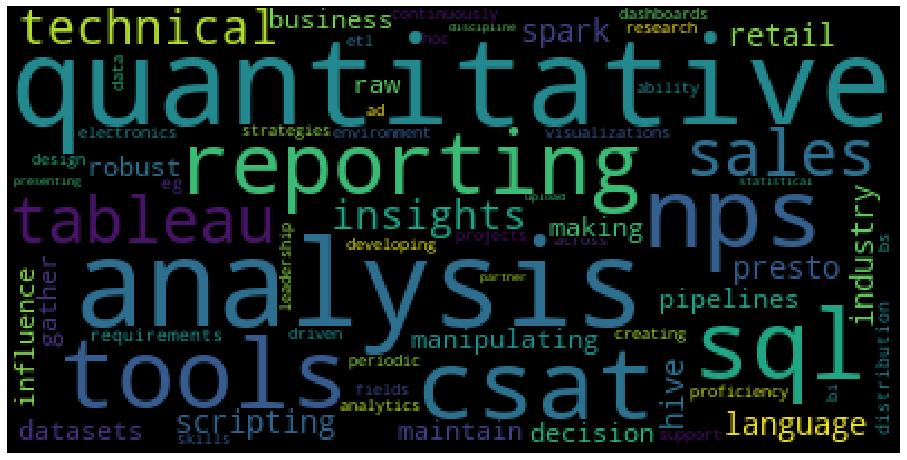

In [22]:
draw_word_cloud(text,"analyst",st_wrds)

### AR/VR Developer/Engineer Job posting

In [23]:
# extract the keywords (skill sets) from the JD of the job posts 
# for the position of AR/VR engineer in Menlo Park, CA.
r.extract_keywords_from_text(''.join(raw_data[raw_data["Role"]=="engineer"].JD_processed.values))

skills_engineer = r.get_ranked_phrases_with_scores()

In [24]:
df_engineer = pd.DataFrame(skills_engineer, columns=['score', 'keywords'])

In [25]:
df_engineer.head()

,score,keywords
0,9.0,visual system guide
1,9.0,underlying implementations used
2,9.0,translation lookaside buffer
3,9.0,status escalating risks
4,9.0,ray tracing rasterization


In [26]:
df_engineer.tail()

,score,keywords
575,1.0,7
576,1.0,40
577,1.0,30
578,1.0,2
579,1.0,1


In [27]:
# filter out the less important words from the result
# based on the scores of each words assigned by RAKE NLTK Library
skills_engineer = list(filter(lambda x: int(x[0]) > 3 , skills_engineer))

In [28]:
# create string from the list of tuples for drawing wordcloud
# lets take first 50 words only 
text = get_words_as_string(skills_engineer[:50])

## EDA
***
Let's draw a wordcloud using the extracted keywords from the JD for an Engineer role

In [29]:
st_wrds = ['product','manufacturing','knowledge','electronics','quality','mechanical','shipping']

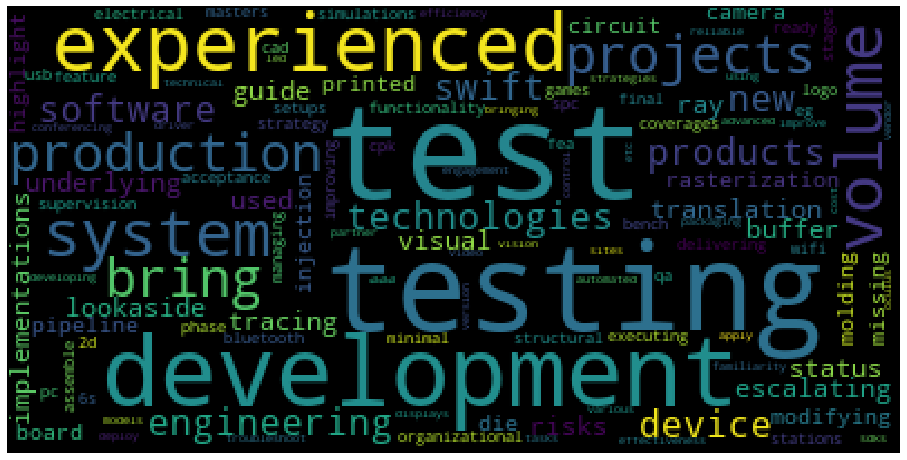

In [30]:
draw_word_cloud(text,"engineer",st_wrds)

### AR/VR Engineering manager Job posting

In [31]:
# extract the keywords (skill sets) from the JD of the job posts 
# for the position of AR/VR manager in engineering in Menlo Park, CA.
r.extract_keywords_from_text(''.join(raw_data[raw_data["Role"]=="Engineering manager"].JD_processed.values))

skills_engineer_manager = r.get_ranked_phrases_with_scores()

In [32]:
df_engineer_mgr = pd.DataFrame(skills_engineer_manager, columns=['score', 'keywords'])

In [33]:
df_engineer_mgr.head()

,score,keywords
0,9.0,windows linux mac
1,9.0,skill levels long
2,9.0,operations establishing metrics
3,9.0,dedicated recruiting staff
4,9.0,continued development 10


In [34]:
df_engineer_mgr.tail()

,score,keywords
99,1.0,collaboration
100,1.0,closely
101,1.0,builds
102,1.0,android
103,1.0,accountability


In [35]:
# filter out the less important words from the result
# based on the scores of each words assigned by RAKE NLTK Library
skills_engineer_manager = list(filter(lambda x: int(x[0]) > 4 , skills_engineer_manager))

In [36]:
skills_engineer_manager[:5]

[(9.0, 'windows linux mac'),
 (9.0, 'skill levels long'),
 (9.0, 'operations establishing metrics'),
 (9.0, 'dedicated recruiting staff'),
 (9.0, 'continued development 10')]

In [37]:
# create string from the list of tuples for drawing wordcloud
text = get_words_as_string(skills_engineer_manager)

## EDA
***
Let's draw a wordcloud using the extracted keywords from the JD for an Engineer Manager role

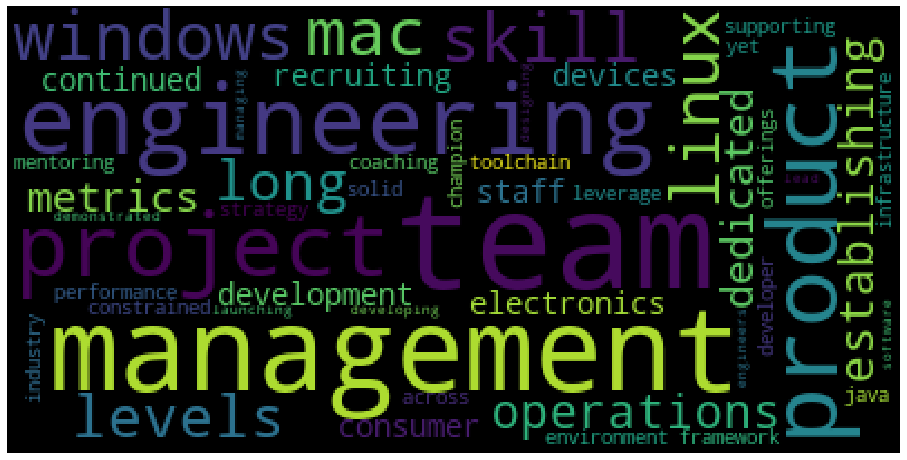

In [38]:
draw_word_cloud(text,"Engineering Manager",[])

### AR/VR financial analyst Job posting

In [39]:
# extract the keywords (skill sets) from the JD of the job posts 
# for the position of AR/VR financial analyst in Menlo Park, CA.
r.extract_keywords_from_text(''.join(raw_data[raw_data["Role"]=="financial analyst"].JD_processed.values))

skills_financial_analyst = r.get_ranked_phrases_with_scores()

In [40]:
df_financial_analyst = pd.DataFrame(skills_financial_analyst, columns=['score', 'keywords'])

In [41]:
df_financial_analyst.head()

,score,keywords
0,9.0,stream process owners
1,9.0,reporting provide fp
2,9.0,range planning design
3,9.0,influencing functional leaders
4,9.0,growth tech company


In [42]:
df_financial_analyst.tail()

,score,keywords
40,1.0,high
41,1.0,focus
42,1.0,end
43,1.0,consumer
44,1.0,ar


In [43]:
# filter out the less important words from the result
# based on the scores of each words assigned by RAKE NLTK Library
skills_financial_analyst = list(filter(lambda x: int(x[0]) > 2 , skills_financial_analyst))

In [44]:
# create string from the list of tuples for drawing wordcloud
text = get_words_as_string(skills_financial_analyst)

## EDA
***
Let's draw a wordcloud using the extracted keywords from the JD for a financial analyst role

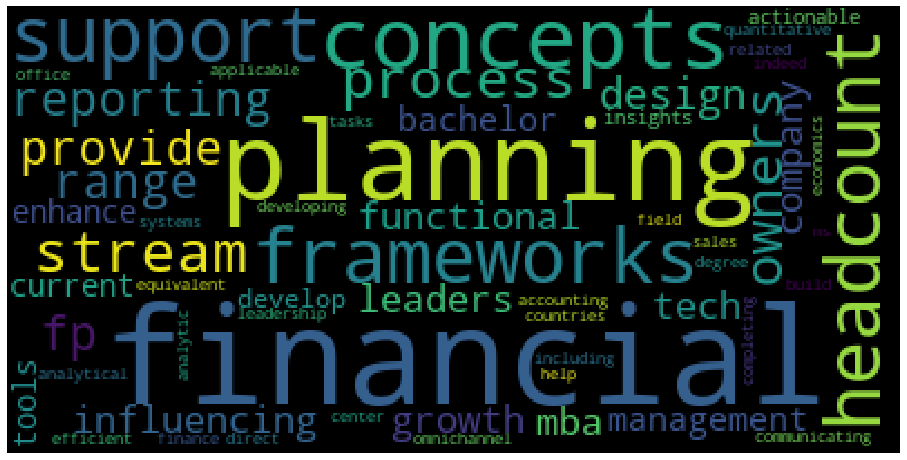

In [45]:
draw_word_cloud(text,"financial analyst",[])

## Save the result into local disk

In [48]:
df_analyst.to_csv("out/skills_analyst.csv",header=True,index=False)
df_engineer.to_csv("out/skills_engineer.csv",header=True,index=False)
df_engineer_mgr.to_csv("out/skills_engineer_mgr.csv",header=True,index=False)
df_financial_analyst.to_csv("out/skills_financial_analyst.csv",header=True,index=False)